### Answer Sheet - Anupam Vaish

### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.


### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### `Datasets Information:`


*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating



*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)



*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use


**`Please provide you insights wherever necessary.`**

## 1. Import the necessary packages - 2.5 marks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

## 2. Read the 3 datasets into dataframes

In [2]:
rating_data=pd.read_csv("data.csv")
movie_data=pd.read_csv("item.csv")
user_data=pd.read_csv("user.csv")

In [3]:
rating_data.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
movie_data.tail()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1680,1682,Scream of Stone (Schrei aus Stein),08-Mar-1996,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
movie_data.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [6]:
user_data.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


## 3. Apply info, shape, describe, and find the number of missing values in the data

In [7]:
print("Shape of Rating DS-->",rating_data.shape)
print("Shape of Movie DS-->",movie_data.shape)
print("Shape of User data-->",user_data.shape)

Shape of Rating DS--> (100000, 4)
Shape of Movie DS--> (1681, 22)
Shape of User data--> (943, 5)


In [8]:
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user id      100000 non-null int64
movie id     100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


In [9]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
movie id        1681 non-null int64
movie title     1681 non-null object
release date    1681 non-null object
unknown         1681 non-null int64
Action          1681 non-null int64
Adventure       1681 non-null int64
Animation       1681 non-null int64
Childrens       1681 non-null int64
Comedy          1681 non-null int64
Crime           1681 non-null int64
Documentary     1681 non-null int64
Drama           1681 non-null int64
Fantasy         1681 non-null int64
Film-Noir       1681 non-null int64
Horror          1681 non-null int64
Musical         1681 non-null int64
Mystery         1681 non-null int64
Romance         1681 non-null int64
Sci-Fi          1681 non-null int64
Thriller        1681 non-null int64
War             1681 non-null int64
Western         1681 non-null int64
dtypes: int64(20), object(2)
memory usage: 289.0+ KB


In [10]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user id       943 non-null int64
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [11]:
### Describe of all 3 datasets
rating_data.describe()

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [12]:
movie_data.describe()

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
user_data.describe()

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


### Find Missing Values in the data

In [14]:
rating_data.isnull().sum()

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

In [15]:
movie_data.isnull().sum()

movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

In [16]:
user_data.isnull().sum()

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

## 4. Find the number of movies per genre using the item data

In [17]:
columns=np.asarray(movie_data.columns);
columns_req=columns[3:]
#print(columns_req)
for i in columns_req:
    print('\nTotal Movies of Genre >>',i,'<< are >>',movie_data[i].sum().sum(),"<<")


#print("Sum--",movie_data['Comedy'].sum().sum())


Total Movies of Genre >> unknown << are >> 1 <<

Total Movies of Genre >> Action << are >> 251 <<

Total Movies of Genre >> Adventure << are >> 135 <<

Total Movies of Genre >> Animation << are >> 42 <<

Total Movies of Genre >> Childrens << are >> 122 <<

Total Movies of Genre >> Comedy << are >> 505 <<

Total Movies of Genre >> Crime << are >> 109 <<

Total Movies of Genre >> Documentary << are >> 50 <<

Total Movies of Genre >> Drama << are >> 725 <<

Total Movies of Genre >> Fantasy << are >> 22 <<

Total Movies of Genre >> Film-Noir << are >> 24 <<

Total Movies of Genre >> Horror << are >> 92 <<

Total Movies of Genre >> Musical << are >> 56 <<

Total Movies of Genre >> Mystery << are >> 61 <<

Total Movies of Genre >> Romance << are >> 247 <<

Total Movies of Genre >> Sci-Fi << are >> 101 <<

Total Movies of Genre >> Thriller << are >> 251 <<

Total Movies of Genre >> War << are >> 71 <<

Total Movies of Genre >> Western << are >> 27 <<


## 5. Drop the movie where the genre is unknown

In [18]:
print("Movie Index of Unknown Genre>>",movie_data[movie_data['unknown']==1].index)
print("Movie of Unknow Genre>>",movie_data[movie_data['unknown']==1])
movie_data.drop(movie_data[movie_data['unknown']==1].index,inplace=True)
movie_data[movie_data['unknown']==1]

Movie Index of Unknown Genre>> Int64Index([1371], dtype='int64')
Movie of Unknow Genre>>       movie id    movie title release date  unknown  Action  Adventure  \
1371      1373  Good Morning    4-Feb-1971        1       0          0   

      Animation  Childrens  Comedy  Crime  ...  Fantasy  Film-Noir  Horror  \
1371          0          0       0      0  ...        0          0       0   

      Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western  
1371        0        0        0       0         0    0        0  

[1 rows x 22 columns]


,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western


In [19]:
movie_data.shape

(1680, 22)

## 6. Find the movies that have more than one genre

In [20]:
movie_data.shape

(1680, 22)

In [21]:
#movie_data_tmp=movie_data.loc[:,'unknown':'Western'].copy()
#movie_data_tmp.head()

In [22]:
#movie_data_tmp['genre']=movie_data_tmp.sum(axis=1)

In [23]:
#movie_data_tmp.head()

In [24]:
# Display movie name, number of genres for the movie in dataframe
movie_data[movie_data.loc[:,'unknown':'Western'].sum(axis=1) >1]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6,7,Twelve Monkeys,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,1669,MURDER and murder,20-Jun-1997,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1668,1670,Tainted,01-Feb-1998,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1671,1673,Mirage,01-Jan-1995,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [25]:
# Listing movies having more than 1 genre
movie_data['movie title'][movie_data.loc[:,'unknown':'Western'].sum(axis=1) >1]

0               Toy Story 
1               GoldenEye 
3              Get Shorty 
4                 Copycat 
6          Twelve Monkeys 
               ...        
1667    MURDER and murder 
1668              Tainted 
1671               Mirage 
1677            B. Monkey 
1678        Sliding Doors 
Name: movie title, Length: 849, dtype: object

In [26]:
# also print(total number of movies which have more than one genres)
movie_data['movie title'][movie_data.loc[:,'unknown':'Western'].sum(axis=1) >1].count()

849

## 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation'

In [27]:
rating_data.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [28]:
### Use distplot for rating
#plt.figure(figsize=(10,5))
#sns.distplot(rating_data['rating'])

In [29]:
user_data.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


### 7.1 Use distplot for age. 

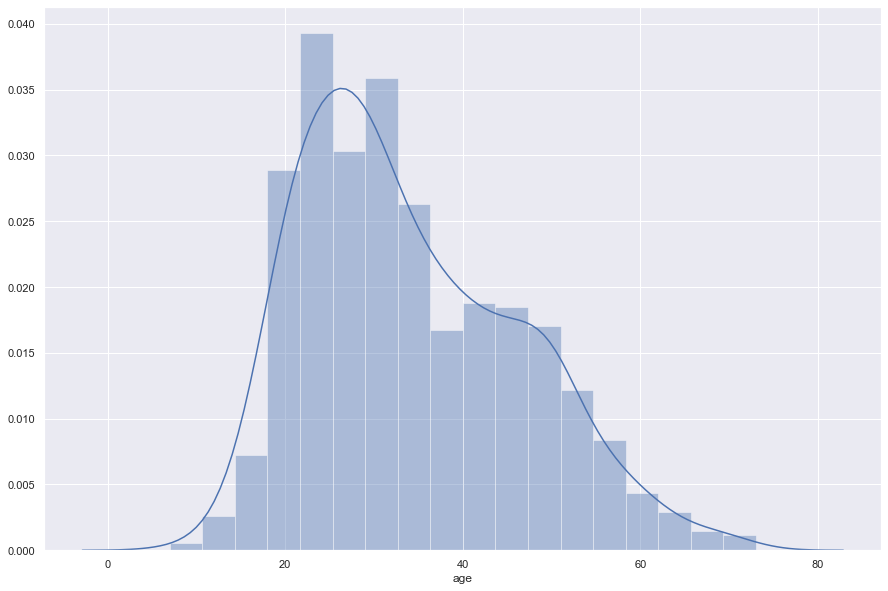

In [30]:
#Use distplot for age. Use lineplot or countplot for release year.
plt.figure(figsize=(15,10))
sns.distplot(user_data['age'])

In [31]:
movie_data['year']=pd.to_datetime(movie_data['release date']).dt.year

### 7.2 Use lineplot or countplot for release year.

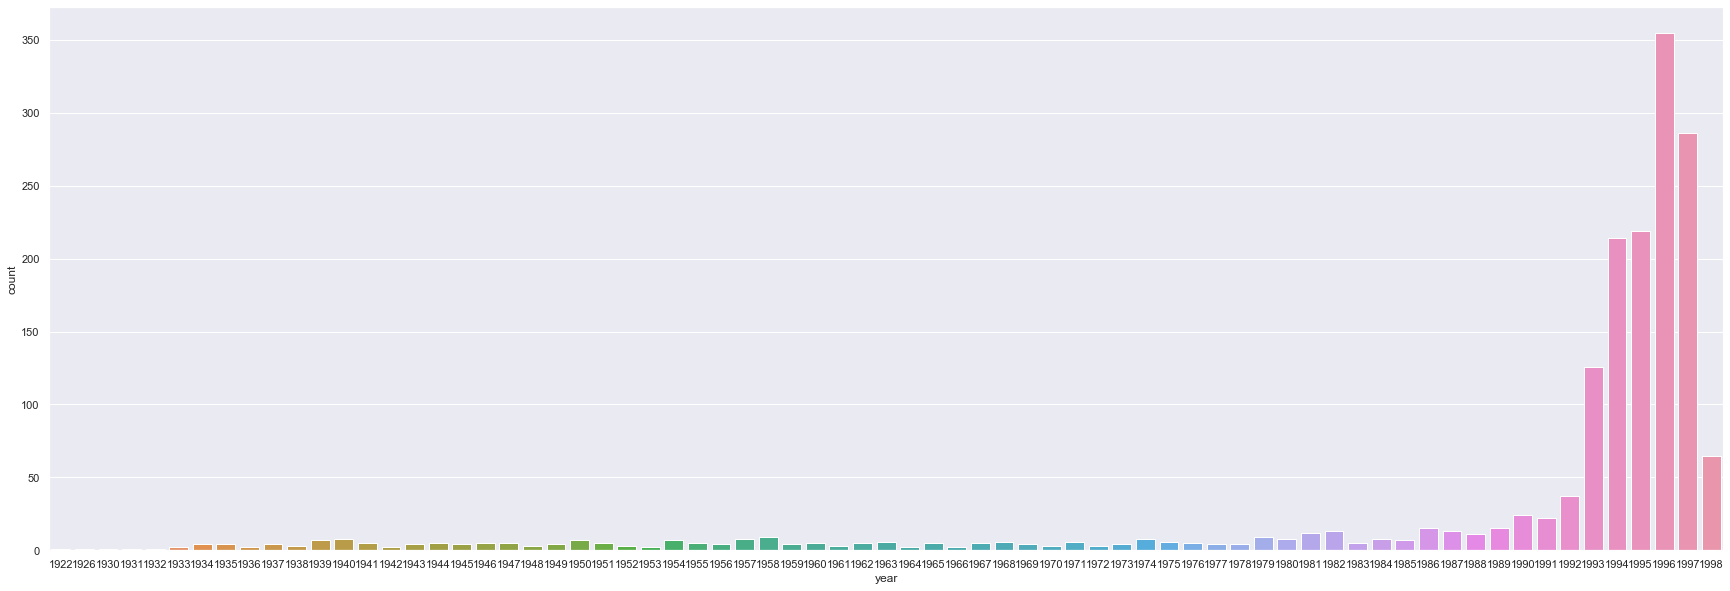

In [32]:
plt.figure(figsize=(30,10))
sns.countplot(movie_data['year']);

### Use lineplot or countplot for release year.

In [33]:
#print("Unique--\n",movie_data['year'].unique())
#print("NUnique--\n",len(movie_data['year'].unique()))
#print("Value Counts--\n",movie_data['year'].value_counts())
df_tmp=pd.DataFrame(movie_data['year'].value_counts(),columns=['year','count'])
#print('--------------')
df_tmp.reset_index(inplace=True)
df_tmp.columns=['year','count','else']
df_tmp.drop('else',axis=1,inplace=True)
df_tmp




,year,count
0,1996,355
1,1997,286
2,1995,219
3,1994,214
4,1993,126
...,...,...
66,1932,1
67,1931,1
68,1930,1
69,1926,1


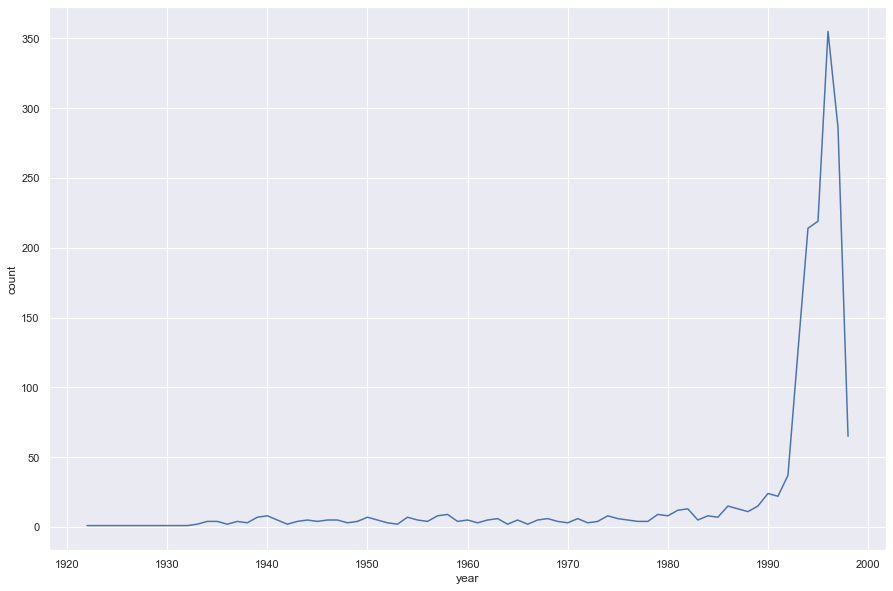

In [34]:
# Also plotting lineplot for Release year
plt.figure(figsize=(15,10))
sns.lineplot(x='year',y='count',data=df_tmp)

### 7.3 Rating Percentage Plot

In [35]:
# Rating Percentage Plot

print("Unique--\n",rating_data['rating'].unique())
print("Value Counts--\n",rating_data['rating'].value_counts())
rt_tmp=pd.DataFrame(rating_data['rating'].value_counts(),columns=['rating','count'])
rt_tmp.reset_index(inplace=True)
rt_tmp.columns=['rating','count','else']
rt_tmp.drop('else',axis=1,inplace=True)
print('sum--',rt_tmp['count'].sum())
print('percent--',rt_tmp['count']*100/rt_tmp['count'].sum())
rt_tmp['percent']=rt_tmp['count']/rt_tmp['count'].sum()*100
rt_tmp

Unique--
 [3 1 2 4 5]
Value Counts--
 4    34174
3    27145
5    21201
2    11370
1     6110
Name: rating, dtype: int64
sum-- 100000
percent-- 0    34.174
1    27.145
2    21.201
3    11.370
4     6.110
Name: count, dtype: float64


,rating,count,percent
0,4,34174,34.174
1,3,27145,27.145
2,5,21201,21.201
3,2,11370,11.370
4,1,6110,6.110


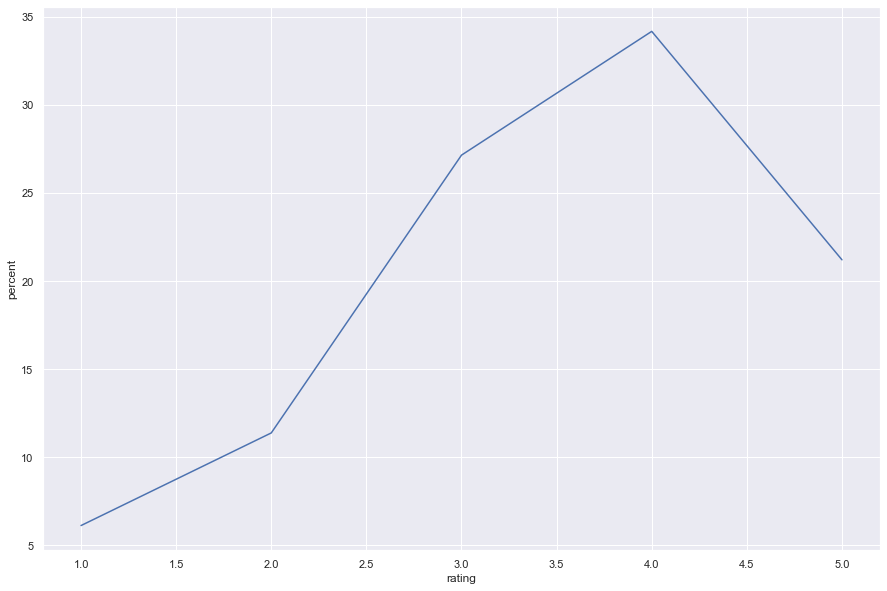

In [36]:
#Plot percentages in y-axis and categories in x-axis for ratings,
plt.figure(figsize=(15,10))
sns.lineplot(x='rating',y='percent',data=rt_tmp)

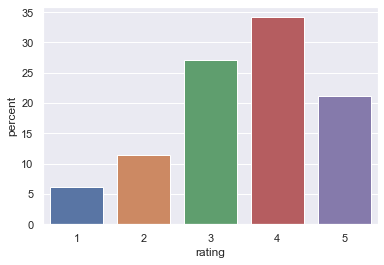

In [37]:
# Bar Plot for Rating Percentage
sns.barplot(x='rating',y='percent',data=rt_tmp)

### 7.4 distplot for gender & lineplot for gender percentage. 

In [38]:
### Use distplot for gender
#plt.figure(figsize=(10,5))
#sns.distplot(user_data['gender'])

print("Unique--\n",user_data['gender'].unique())
print("Value Counts--\n",user_data['gender'].value_counts())
usr_tmp=pd.DataFrame(user_data['gender'].value_counts(),columns=['gender','count'])
usr_tmp.reset_index(inplace=True)
usr_tmp.columns=['gender','count','else']
usr_tmp.drop('else',axis=1,inplace=True)
print('sum--',usr_tmp['count'].sum())
print('percent--',usr_tmp['count']*100/usr_tmp['count'].sum())
usr_tmp['percent']=usr_tmp['count']/usr_tmp['count'].sum()*100
usr_tmp

Unique--
 ['M' 'F']
Value Counts--
 M    670
F    273
Name: gender, dtype: int64
sum-- 943
percent-- 0    71.049841
1    28.950159
Name: count, dtype: float64


,gender,count,percent
0,M,670,71.049841
1,F,273,28.950159


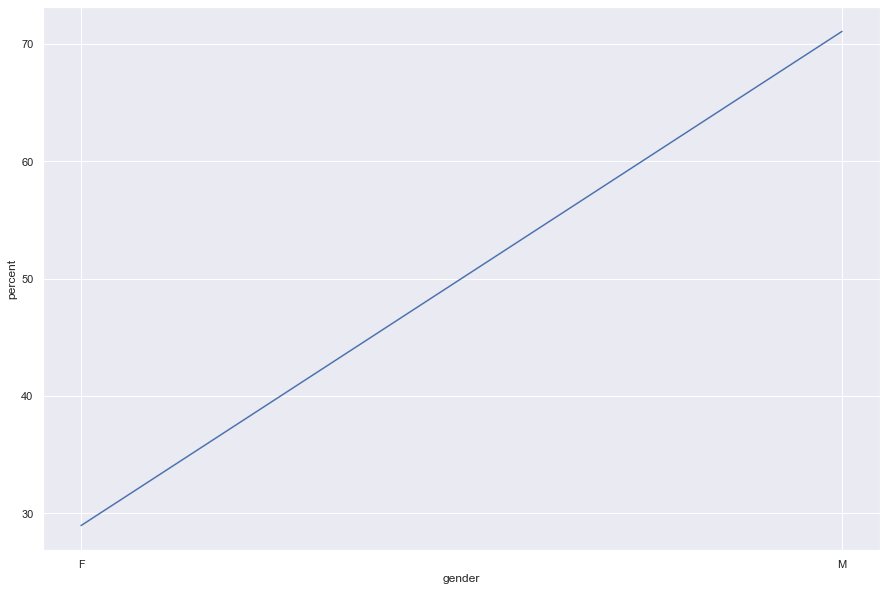

In [39]:
# Line Plot for Gender Percentage
plt.figure(figsize=(15,10))
sns.lineplot(x='gender',y='percent',data=usr_tmp)

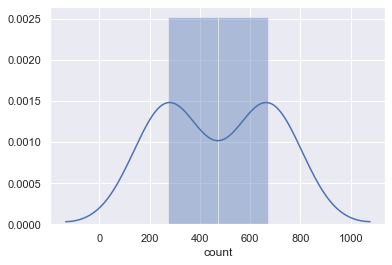

In [40]:
# Dist Plot for Gender Count
sns.distplot(usr_tmp['count'])

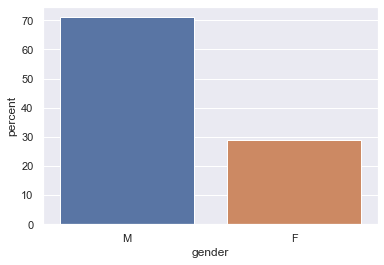

In [41]:
# Bar Plot for Gender Percentage
sns.barplot(x='gender',y='percent',data=usr_tmp)

### 7.5 Use distplot for Occupation & lineplot for occupation percentage.

In [42]:
usr_occu=pd.DataFrame(user_data['occupation'].value_counts(),columns=['occupation','count'])
usr_occu.reset_index(inplace=True)
usr_occu.columns=['occupation','count','else']
usr_occu.drop('else',axis=1,inplace=True)
print('sum--',usr_occu['count'].sum())
print('percent--',usr_occu['count']*100/usr_occu['count'].sum())
usr_occu['percent']=usr_occu['count']/usr_occu['count'].sum()*100
usr_occu

sum-- 943
percent-- 0     20.784730
1     11.134677
2     10.074231
3      8.377519
4      7.104984
5      6.998940
6      5.408271
7      4.772004
8      3.393425
9      3.287381
10     2.969247
11     2.863203
12     2.757158
13     1.908802
14     1.696713
15     1.484624
16     1.272534
17     1.272534
18     0.954401
19     0.742312
20     0.742312
Name: count, dtype: float64


,occupation,count,percent
0,student,196,20.784730
1,other,105,11.134677
2,educator,95,10.074231
3,administrator,79,8.377519
4,engineer,67,7.104984
5,programmer,66,6.998940
6,librarian,51,5.408271
7,writer,45,4.772004
8,executive,32,3.393425
9,scientist,31,3.287381


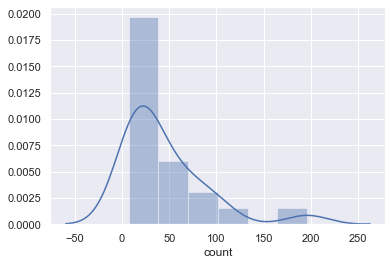

In [43]:
sns.distplot(usr_occu['count'])

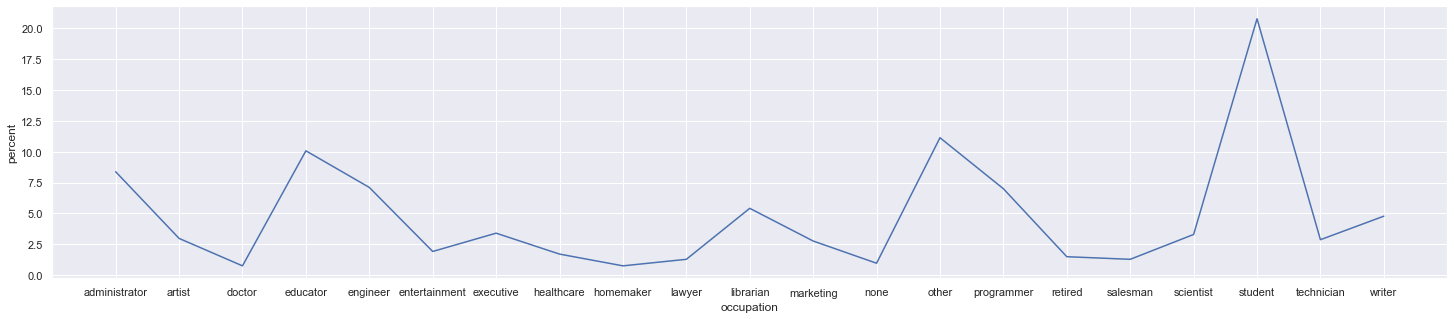

In [44]:
plt.figure(figsize=(25,5))
sns.lineplot(x='occupation',y='percent',data=usr_occu)

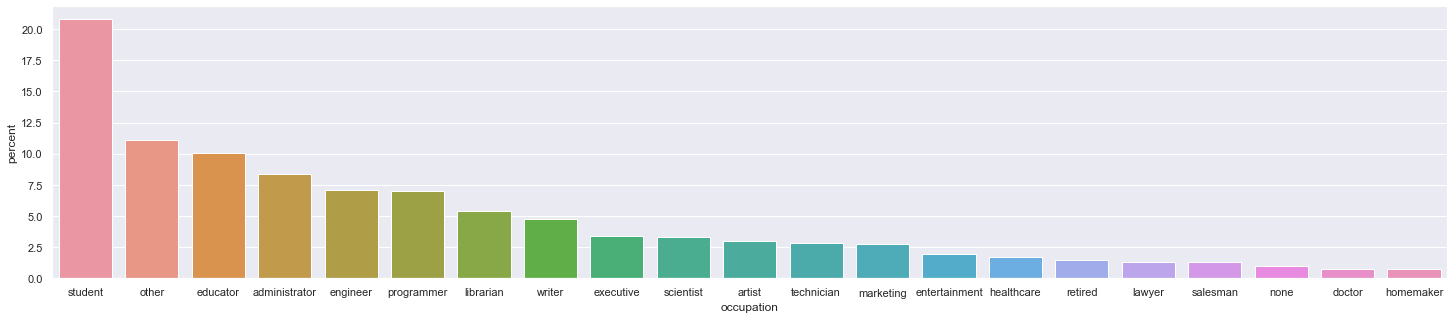

In [45]:
plt.figure(figsize=(25,5))
sns.barplot(x='occupation',y='percent',data=usr_occu)

# 8. Visualize how popularity of genres has changed over the years

### Note that you need to use the percent of number of releases in a year as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use sum(axis=1) store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year. (df.div(df['total'], axis= 0) * 100)
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years in one go.

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.

In [46]:
rating_data[rating_data['movie id']==1678]

,user id,movie id,rating,timestamp
75323,863,1678,1,889289570


In [47]:
movie_data.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1995
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1995


### movie_rating_df shows genre released per year and total no of movies in all genres/released per year

In [48]:
columns=np.asarray(movie_data.columns);
columns_req=columns[4:-1]

print(columns_req)
movie_rating_df=pd.DataFrame()

# Counting genres/year and loading them into another dataframe 
for i in columns_req:
    df_tmp=movie_data[[i]].groupby([movie_data['year']]).sum()
    movie_rating_df=pd.concat([movie_rating_df,df_tmp],axis=1,sort=False)

# Total movies release per year
#movie_rating_df['total']=movie_data['year'].value_counts(ascending=True)

# Doing sum of the row and storing them in column total
movie_rating_df['total']=movie_rating_df.loc[:,'Action':'Western'].sum(axis=1)
movie_rating_df

['Action' 'Adventure' 'Animation' 'Childrens' 'Comedy' 'Crime'
 'Documentary' 'Drama' 'Fantasy' 'Film-Noir' 'Horror' 'Musical' 'Mystery'
 'Romance' 'Sci-Fi' 'Thriller' 'War' 'Western']


,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
year,,,,,,,,,,,,,,,,,,,
1922,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1926,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1930,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1931,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,3
1932,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,30,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6,353
1995,40,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2,381
1996,44,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2,559


### Hint 2: Now divide the value of each genre in that year by total to get percentage number of release in a particular year. (df.div(df['total'], axis= 0) * 100)

In [49]:
# Making another dataframe to contain Genre Percentage released per year
# Method 1
columns1=np.asarray(movie_rating_df.columns);
columns_req1=columns1[0:-1]
#print(type(columns_req1))
#print(columns_req1)

movie_percent_df=pd.DataFrame()
for i in columns_req:
    name=str(i) + "_p"
    #print('name--',name)
    df_tmp=movie_rating_df[i]*100/movie_rating_df['total']
    movie_percent_df=pd.concat([movie_percent_df,df_tmp.rename(name)],axis=1,sort=False)
# Dataframe for genre percent/year
movie_percent_df

,Action_p,Adventure_p,Animation_p,Childrens_p,Comedy_p,Crime_p,Documentary_p,Drama_p,Fantasy_p,Film-Noir_p,Horror_p,Musical_p,Mystery_p,Romance_p,Sci-Fi_p,Thriller_p,War_p,Western_p
1922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1926,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1930,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1931,0.000000,0.000000,0.000000,0.000000,0.000000,33.333333,0.000000,0.000000,0.000000,33.333333,0.000000,0.000000,0.000000,0.000000,0.000000,33.333333,0.000000,0.000000
1932,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,50.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,8.498584,3.682720,1.133144,4.249292,23.229462,2.266289,2.549575,27.478754,0.849858,0.000000,2.266289,0.566572,0.566572,9.915014,1.983003,7.082153,1.983003,1.699717
1995,10.498688,5.774278,1.574803,5.511811,16.535433,2.887139,1.312336,23.359580,0.787402,0.262467,3.674541,0.787402,1.312336,9.711286,3.937008,10.236220,1.312336,0.524934
1996,7.871199,4.293381,1.610018,3.756708,19.320215,3.756708,3.220036,30.411449,1.073345,0.178891,1.967800,1.610018,1.073345,6.797853,2.683363,8.407871,1.610018,0.357782
1997,9.274194,4.032258,0.604839,4.435484,17.540323,6.048387,1.209677,22.782258,0.806452,0.403226,1.612903,1.008065,3.629032,10.282258,2.620968,10.887097,2.822581,0.000000


In [50]:
# Method 2
movie_percent2_df=(movie_rating_df.div(movie_rating_df['total'], axis= 0) * 100)
movie_percent2_df

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
year,,,,,,,,,,,,,,,,,,,
1922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.0
1926,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.0
1930,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.0
1931,0.000000,0.000000,0.000000,0.000000,0.000000,33.333333,0.000000,0.000000,0.000000,33.333333,0.000000,0.000000,0.000000,0.000000,0.000000,33.333333,0.000000,0.000000,100.0
1932,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,50.000000,0.000000,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,8.498584,3.682720,1.133144,4.249292,23.229462,2.266289,2.549575,27.478754,0.849858,0.000000,2.266289,0.566572,0.566572,9.915014,1.983003,7.082153,1.983003,1.699717,100.0
1995,10.498688,5.774278,1.574803,5.511811,16.535433,2.887139,1.312336,23.359580,0.787402,0.262467,3.674541,0.787402,1.312336,9.711286,3.937008,10.236220,1.312336,0.524934,100.0
1996,7.871199,4.293381,1.610018,3.756708,19.320215,3.756708,3.220036,30.411449,1.073345,0.178891,1.967800,1.610018,1.073345,6.797853,2.683363,8.407871,1.610018,0.357782,100.0


In [51]:
movie_percent_df.tail()

,Action_p,Adventure_p,Animation_p,Childrens_p,Comedy_p,Crime_p,Documentary_p,Drama_p,Fantasy_p,Film-Noir_p,Horror_p,Musical_p,Mystery_p,Romance_p,Sci-Fi_p,Thriller_p,War_p,Western_p
1994,8.498584,3.682720,1.133144,4.249292,23.229462,2.266289,2.549575,27.478754,0.849858,0.000000,2.266289,0.566572,0.566572,9.915014,1.983003,7.082153,1.983003,1.699717
1995,10.498688,5.774278,1.574803,5.511811,16.535433,2.887139,1.312336,23.359580,0.787402,0.262467,3.674541,0.787402,1.312336,9.711286,3.937008,10.236220,1.312336,0.524934
1996,7.871199,4.293381,1.610018,3.756708,19.320215,3.756708,3.220036,30.411449,1.073345,0.178891,1.967800,1.610018,1.073345,6.797853,2.683363,8.407871,1.610018,0.357782
1997,9.274194,4.032258,0.604839,4.435484,17.540323,6.048387,1.209677,22.782258,0.806452,0.403226,1.612903,1.008065,3.629032,10.282258,2.620968,10.887097,2.822581,0.000000
1998,10.256410,2.564103,0.000000,0.854701,11.111111,5.982906,2.564103,28.205128,0.854701,1.709402,3.418803,0.854701,2.564103,9.401709,4.273504,15.384615,0.000000,0.000000


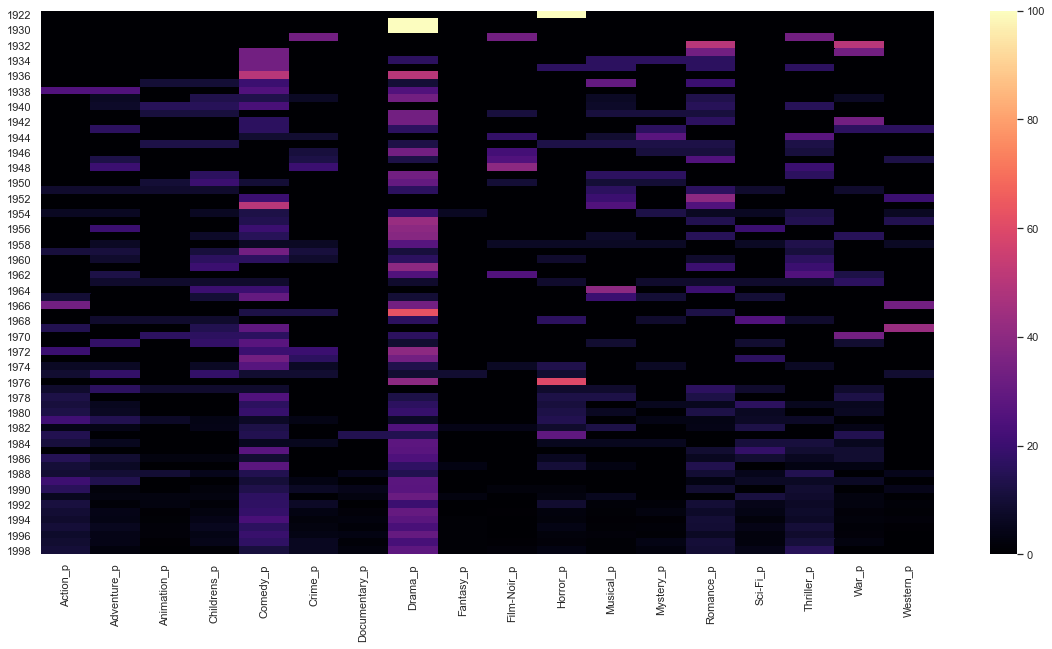

In [52]:
# Heatmap plot of Genre percentage released per year
plt.figure(figsize=(20,10))
sns.heatmap(movie_percent_df,cmap='magma')

## 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100

In [53]:
rating_data.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [54]:
#rating_data[rating_data['movie id']==5].sum()

In [55]:
# Making a DF of all Movies by MovieId and the sum of ratings received
total_average_rt=pd.DataFrame(rating_data['rating'].groupby([rating_data['movie id']]).sum())
# To get count of Ratings
total_average_rt['count']=rating_data['rating'].groupby([rating_data['movie id']]).count()
# To get average of ratings per movie id
total_average_rt['average']=total_average_rt['rating']/total_average_rt['count']
total_average_rt.rename(columns={'rating':'total rating'},inplace=True)
# The count of ratings and average ratings for every movie.
total_average_rt

,total rating,count,average
movie id,,,
1,1753,452,3.878319
2,420,131,3.206107
3,273,90,3.033333
4,742,209,3.550239
5,284,86,3.302326
...,...,...,...
1678,1,1,1.000000
1679,3,1,3.000000
1680,2,1,2.000000


In [56]:
# Slice the movies which have ratings more than 100
high_rankers_df=pd.DataFrame(total_average_rt[total_average_rt['total rating']>100])
high_rankers_df

,total rating,count,average
movie id,,,
1,1753,452,3.878319
2,420,131,3.206107
3,273,90,3.033333
4,742,209,3.550239
5,284,86,3.302326
...,...,...,...
1217,112,39,2.871795
1221,136,39,3.487179
1226,108,32,3.375000


In [57]:
# Sort values according to average rating such that movie which highest rating is on top.
high_rankers_df['average'].sort_values(ascending=False).head(25)

movie id
408    4.491071
318    4.466443
169    4.466102
483    4.456790
114    4.447761
64     4.445230
603    4.387560
12     4.385768
50     4.358491
178    4.344000
513    4.333333
134    4.292929
963    4.292683
427    4.292237
357    4.291667
98     4.289744
480    4.284916
127    4.283293
285    4.265432
272    4.262626
251    4.260870
657    4.259542
474    4.252577
174    4.252381
479    4.251397
Name: average, dtype: float64

In [58]:
# Select top 25 movies
top_25_df=pd.DataFrame(high_rankers_df['average'].sort_values(ascending=False)).head(25)
print(top_25_df.shape)
top_25_df

(25, 1)


,average
movie id,
408,4.491071
318,4.466443
169,4.466102
483,4.456790
114,4.447761
64,4.445230
603,4.387560
12,4.385768
50,4.358491


In [59]:
# Top 25 movies according to average ratings such that each movie has number of ratings more than 100 
# You will have to use the .merge() function to get the movie titles.
df_merged=pd.merge(top_25_df,movie_data,how='inner',on='movie id')
df_merged[['movie id','movie title','average']]

,movie id,movie title,average
0,408,"Close Shave, A",4.491071
1,318,Schindler's List,4.466443
2,169,"Wrong Trousers, The",4.466102
3,483,Casablanca,4.456790
4,114,Wallace & Gromit: The Best of Aardman Animation,4.447761
5,64,"Shawshank Redemption, The",4.445230
6,603,Rear Window,4.387560
7,12,"Usual Suspects, The",4.385768
8,50,Star Wars,4.358491
9,178,12 Angry Men,4.344000


## 10. See gender distribution across different genres check for the validity of the below statements
* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

In [60]:
# Merging tha 3 datasets and removing un-necessary columns
user_merged=pd.merge(user_data,rating_data,how='outer',on='user id')
user_merged.drop(['age','occupation','zip code','timestamp'],axis=1,inplace=True)
user_merged
user_movie_merged=pd.merge(user_merged,movie_data,how='outer',on='movie id')
user_movie_merged.drop(['unknown','release date','year'],axis=1,inplace=True)
user_movie_merged

,user id,gender,movie id,rating,movie title,Action,Adventure,Animation,Childrens,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,M,61,4,Three Colors: White,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13,M,61,4,Three Colors: White,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,18,F,61,4,Three Colors: White,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,58,M,61,5,Three Colors: White,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,59,M,61,4,Three Colors: White,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,863,M,1679,3,B. Monkey,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
99996,863,M,1678,1,Mat' i syn,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,863,M,1680,2,Sliding Doors,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
99998,896,M,1681,3,You So Crazy,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
action_df=user_movie_merged[user_movie_merged['Action']==1.0].groupby(['gender','Action']).agg({'rating': 'sum'}).reset_index()
#action_df=user_movie_merged.groupby(['gender','Action']).agg({'rating': 'sum'}).reset_index()
print(action_df['rating'].sum())
print(user_movie_merged.columns)
action_df['percent']=action_df['rating'] *100 /action_df['rating'].sum()
action_df
#action_df[action_df['Action']==1.0]

89056
Index(['user id', 'gender', 'movie id', 'rating', 'movie title', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')


,gender,Action,rating,percent
0,F,1.0,18960,21.289975
1,M,1.0,70096,78.710025


### * Men watch more drama than women --True

In [62]:
drama_df=user_movie_merged[user_movie_merged['Drama']==1.0].groupby(['gender','Drama']).agg({'rating': 'sum'}).reset_index()
drama_df['percent']=drama_df['rating'] *100 /drama_df['rating'].sum()
drama_df

,gender,Drama,rating,percent
0,F,1.0,40314,27.404356
1,M,1.0,106794,72.595644


### * Women watch more Sci-Fi than men --- False

In [63]:
scifi_df=user_movie_merged[user_movie_merged['Sci-Fi']==1.0].groupby(['gender','Sci-Fi']).agg({'rating': 'sum'}).reset_index()
scifi_df['percent']=scifi_df['rating'] *100 /scifi_df['rating'].sum()
scifi_df

,gender,Sci-Fi,rating,percent
0,F,1.0,9196,20.287681
1,M,1.0,36132,79.712319


### * Men watch more Romance than women -- True

In [64]:
romance_df=user_movie_merged[user_movie_merged['Romance']==1.0].groupby(['gender','Romance']).agg({'rating': 'sum'}).reset_index()
romance_df['percent']=romance_df['rating'] *100 /romance_df['rating'].sum()
romance_df

,gender,Romance,rating,percent
0,F,1.0,21415,30.383644
1,M,1.0,49067,69.616356


In [65]:
# Percentage of gender distribution across different genres
for i in  user_movie_merged.columns[5:]:
    print(i)
    name=str(i)+"_df"
    name=user_movie_merged[user_movie_merged[i]==1.0].groupby(['gender',i]).agg({'rating': 'sum'}).reset_index()
    name['percent']=name['rating'] *100 /name['rating'].sum()
    print(name)
#romance_df=user_movie_merged[user_movie_merged['Romance']==1.0].groupby(['gender','Romance']).agg({'rating': 'sum'}).reset_index()
#romance_df['percent']=romance_df['rating'] *100 /romance_df['rating'].sum()
#romance_df

Action
  gender  Action  rating    percent
0      F     1.0   18960  21.289975
1      M     1.0   70096  78.710025
Adventure
  gender  Adventure  rating    percent
0      F        1.0   11050  22.932924
1      M        1.0   37134  77.067076
Animation
  gender  Animation  rating    percent
0      F        1.0    3609  27.989763
1      M        1.0    9285  72.010237
Childrens
  gender  Childrens  rating    percent
0      F        1.0    7649  31.760993
1      M        1.0   16434  68.239007
Comedy
  gender  Comedy  rating    percent
0      F     1.0   27625  27.283412
1      M     1.0   73627  72.716588
Crime
  gender  Crime  rating    percent
0      F    1.0    6380  21.806002
1      M    1.0   22878  78.193998
Documentary
  gender  Documentary  rating    percent
0      F          1.0     676  24.281609
1      M          1.0    2108  75.718391
Drama
  gender  Drama  rating    percent
0      F    1.0   40314  27.404356
1      M    1.0  106794  72.595644
Fantasy
  gender  Fantasy  ratin

### Another approach for Q10, by counting total ratings across all genres and then deciding popularity of a genre amongst men and women

In [66]:
rate_df=user_movie_merged.groupby(['gender']).agg({'rating': 'sum'}).reset_index()
rate_df

,gender,rating
0,F,90901
1,M,262085


In [67]:
total_female_rating=rate_df['rating'][rate_df['gender']=='F']
print('Total Female Ratings--',total_female_rating[0])

Total Female Ratings-- 90901


In [68]:
total_male_rating=rate_df['rating'][rate_df['gender']=='M']
print('Total Male Ratings--',total_male_rating[1])

Total Male Ratings-- 262085


### Men watch more drama than women --> False,  (Women watch more Drama than men)

In [69]:
# Male, Female total ratings for watching Drama
male_ratings_drama=drama_df['rating'][drama_df['gender']=='M']
print('Man ratings for Drama--',male_ratings_drama[1])
female_ratings_drama=drama_df['rating'][drama_df['gender']=='F']
print('Female ratings for Drama--',female_ratings_drama[0])

Man ratings for Drama-- 106794
Female ratings for Drama-- 40314


In [70]:
# Male, Female percentage ratings for watching Drama from total ratings
percentage_women_drama=female_ratings_drama[0]/total_female_rating *100
print('Female percentage ratings for Drama--',percentage_women_drama[0])
percentage_male_drama=male_ratings_drama[1]/total_male_rating *100
print('Male percentage ratings for Drama--',percentage_male_drama[1])

Female percentage ratings for Drama-- 44.349347091891175
Male percentage ratings for Drama-- 40.74784898029266


### Women watch more Sci-Fi than men - False (Men watch more Sci-Fi than Women)

In [71]:
# Male, Female total ratings for watching Sci-Fi
male_ratings_scifi=scifi_df['rating'][scifi_df['gender']=='M']
print('Man ratings for Sci-Fi--',male_ratings_scifi[1])
female_ratings_scifi=scifi_df['rating'][scifi_df['gender']=='F']
print('Female ratings for Sci-Fi--',female_ratings_scifi[0])

Man ratings for Sci-Fi-- 36132
Female ratings for Sci-Fi-- 9196


In [72]:
# Male, Female percentage ratings for watching Sci-Fi from total ratings
percentage_women_scifi=female_ratings_scifi[0]/total_female_rating *100
print('Female percentage ratings for Sci-Fi--',percentage_women_scifi[0])
percentage_male_scifi=male_ratings_scifi[1]/total_male_rating *100
print('Male percentage ratings for Sci-Fi--',percentage_male_scifi[1])

Female percentage ratings for Sci-Fi-- 10.1165003685328
Male percentage ratings for Sci-Fi-- 13.786367018333747


### Men watch more Romance than women -->False (Women watch more Romance than Men)

In [73]:
# Male, Female total ratings for watching Romance
male_ratings_romance=romance_df['rating'][romance_df['gender']=='M']
print('Man ratings for Romance--',male_ratings_romance[1])
female_ratings_romance=romance_df['rating'][romance_df['gender']=='F']
print('Female ratings for Romance--',female_ratings_scifi[0])

Man ratings for Romance-- 49067
Female ratings for Romance-- 9196


In [74]:
# Male, Female percentage ratings for watching Romance from total ratings
percentage_women_romance=female_ratings_romance[0]/total_female_rating *100
print('Female percentage ratings for Romance--',percentage_women_romance[0])
percentage_male_romance=male_ratings_romance[1]/total_male_rating *100
print('Male percentage ratings for Romance--',percentage_male_romance[1])

Female percentage ratings for Romance-- 23.558596715107644
Male percentage ratings for Romance-- 18.721788732663068
